<a href="https://colab.research.google.com/github/btramduong0810/dsc-mod-1-project-v2-1-online-ds-sp-000/blob/master/Data_Science_in_Action_The_Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

* Student name: **BAO TRAM DUONG**
* Student pace: **SELF-PACED DATA SCIENCE PROGRAM**
* Scheduled project review date/time: 
* Instructor name: **JEFF HERMAN**
* Blog post URL:


# **Part III. B: Table of Contents**

**1.  Introduction**

1.1  Business Statement

**2.  Data Visualization**

**Question 4:** When is the best time of year to release a movie, in term of month and day of the week?

        2.8.  Release time vs. Worldwide Profit
        
             2.8a. General trend                
             2.8b. Top 100 performers trend
        
        2.8c. Number of movies released per month
        
**Question 5**: Is runtime a factor in determining the success of a movie?

        2.9  Runtime vs. Worldwide Profit
        
             2.9a. General trend
             2.9b. Top 100 performers trend     
             2.9c. Top 100 performers with respect Worldwide Profit
             
**Extra:** What is the best studio to work with?

        2.10 Studio vs. Worldwide Profit
        
             2.10a. General trend
             2.10b. Top 100 performers trend
             2.10c. Top 100 performers with respect to Production Budget & Worldwide Profit
             
**Extra:** What is the most popular language?

        2.11 Language 

**3. Actionable Insights**

**4. Conclusion and Future Work**

4.1  Summary of Findings

4.2  Actionable Insights

4.3  Future Works

# **1. INTRODUCTION**

## **1.1 Business Statement**

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired a team of data scientist from Flatiron to help them better understand the movie industry. The team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. The team must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

What makes a movie succesful and how do we create the next blockbuster movie that can return the highest ROI possible?


# **2. DATA VISUALIZATION**

## Display the full dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style('darkgrid')

/Users/baotramduong8/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read data
full_df = pd.read_csv('full_df', index_col = 0)

#preview
full_df.head()

,movie,release_year,studio,language,popularity,runtime_minutes,average_rating,num_votes,release_date,genre,...,creative_type,production_budget,domestic_gross,international_gross,worldwide_gross,worldwide_profit,domestic_profit,international_profit,worldwide_profit_margin,budget_range
0,Avengers: Age of Ultron,2015,BV,en,44.383,141.0,7.3,665594,2015-05-01,Action,...,Super Hero,365000000,459005868,937093334,1396099202,1031099202,94005868,572093334,73.855726,>200M
1,Avengers: Infinity War,2018,BV,en,80.773,149.0,8.5,670926,2018-04-27,Action,...,Super Hero,300000000,678815482,1365725041,2044540523,1744540523,378815482,1065725041,85.326777,>200M
2,Justice League,2017,WB,en,34.953,120.0,6.5,329135,2017-11-17,Action,...,Super Hero,300000000,229024295,426920914,655945209,355945209,-70975705,126920914,54.264473,>200M
3,Spectre,2015,Sony,en,30.318,148.0,6.8,352504,2015-11-06,Action,...,Contemporary Fiction,300000000,200074175,679426585,879500760,579500760,-99925825,379426585,65.889740,>200M
4,The Dark Knight Rises,2012,WB,en,26.220,164.0,8.4,1387769,2012-07-20,Action,...,Super Hero,230000000,448139099,634089008,1082228107,852228107,218139099,404089008,78.747549,>200M


In [3]:
#list of attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range'],
      dtype='object')

## Question 4: When is the best time of year to release a movie?

To answer this question, let's look at 'release_date'

In [4]:
#look at 'release_date' column
#create sub dataset
full_df[['release_date', 'movie', 'worldwide_profit']].head()

,release_date,movie,worldwide_profit
0,2015-05-01,Avengers: Age of Ultron,1031099202
1,2018-04-27,Avengers: Infinity War,1744540523
2,2017-11-17,Justice League,355945209
3,2015-11-06,Spectre,579500760
4,2012-07-20,The Dark Knight Rises,852228107


In [5]:
import datetime
#add 'release_month' column
full_df['release_month'] = pd.DatetimeIndex(full_df['release_date']).month

In [6]:
full_df[['release_date', 'release_month', 'movie', 'worldwide_profit']].head()

,release_date,release_month,movie,worldwide_profit
0,2015-05-01,5,Avengers: Age of Ultron,1031099202
1,2018-04-27,4,Avengers: Infinity War,1744540523
2,2017-11-17,11,Justice League,355945209
3,2015-11-06,11,Spectre,579500760
4,2012-07-20,7,The Dark Knight Rises,852228107


### Month

In [7]:
#create sub dataset for 'release_month' and 'worldwide_profit' for all movies
release_month_vs_profit = full_df[['release_month', 'movie', 'worldwide_profit']]

#create sub dataset for 'release_month' and 'worldwide_profit' for top 100 performers
release_month_vs_100_profit = full_df[['release_month', 'movie', 'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                                    ascending = False)[:100]

Is there a difference between general 'release_month' and top 100 performers' 'release_month'

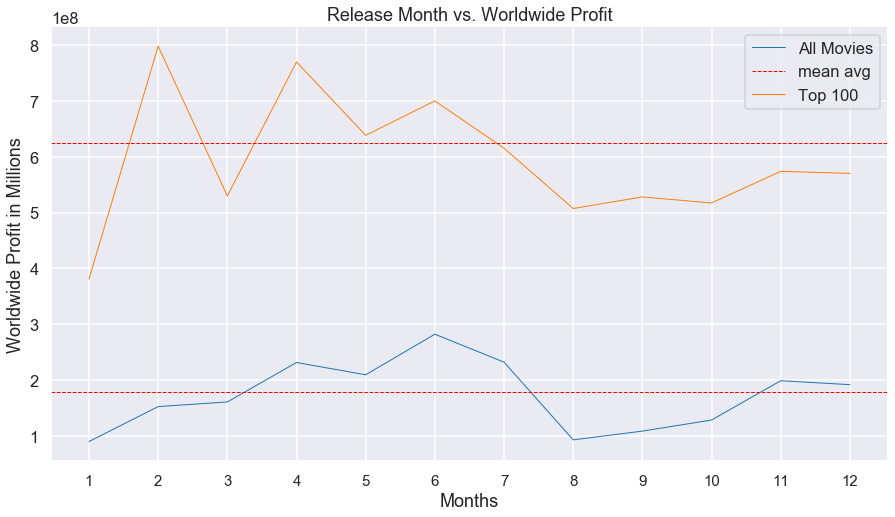

In [52]:
#let's use lineplot to compare the 2 datasets
plt.figure(figsize = (15, 8))

#all movies
sns.lineplot(data = release_month_vs_profit,
             x = 'release_month',
             y = 'worldwide_profit',
             label = 'All Movies',
             linewidth = 1,
             ci = None)

#draw mean()
plt.axhline(release_month_vs_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'mean avg')

#top 100 performers
sns.lineplot(data = release_month_vs_100_profit,
             x = 'release_month',
             y = 'worldwide_profit',
             label = 'Top 100',
             linewidth = 1,
             ci = None)

#draw mean()
plt.axhline(release_month_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.legend(loc='upper right')
plt.title('Release Month vs. Worldwide Profit')
plt.xlabel('Months')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(list(range(1, 13)), fontsize = 15)

#show
plt.show()

In [9]:
#save
plt.savefig('release_month_vs_profit_lineplot')

<Figure size 432x288 with 0 Axes>

We observe very similar trends between the general and the top 100. Only Febuary and April stands out as the difference. Let's investigate.

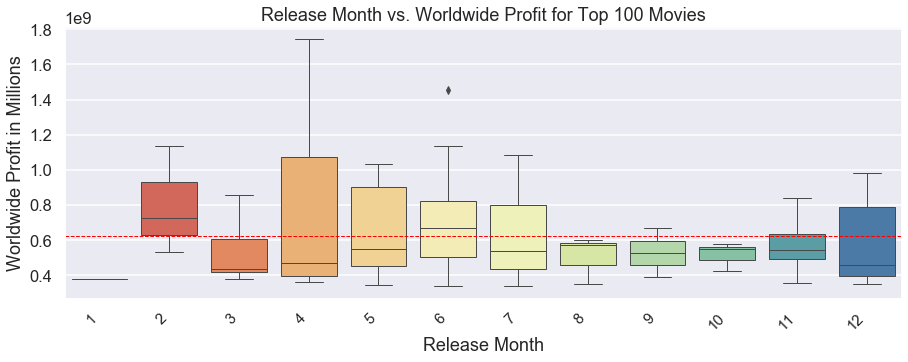

In [10]:
#plot 'release_month' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = release_month_vs_100_profit['release_month'], 
            y = release_month_vs_100_profit['worldwide_profit'],
            palette = 'Spectral', linewidth = 1)

#draw mean()
plt.axhline(release_month_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Release Month vs. Worldwide Profit for Top 100 Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [11]:
#save
plt.savefig('release_month_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

We can see here in general, June is when the most profit is collected. When analyzing only the top 100 performers, it is February and April that are the most fruitful but this could be the outliers since the 2 plots do match up with each other quite similarly. 

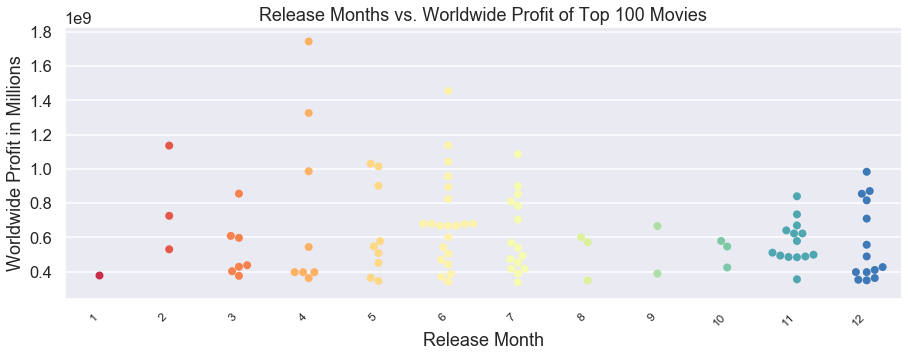

In [12]:
#plot all 'release_month' with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'release_month',
              y = 'worldwide_profit',
              hue = 'release_month',
              data = release_month_vs_100_profit,
              s = 8, palette = 'Spectral',)

#set labels
plt.title('Release Months vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [13]:
#save
plt.savefig('release_month_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

In [14]:
release_month_vs_100_profit[['release_month', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:5]

,release_month,worldwide_profit
1,4,1744540523
16,6,1454943967
31,4,1327179709
59,6,1138334005
21,2,1136498912


We can see here again that April and June are the most fruitful months. 

We do further analysis by looking at the number of movies released per month to see if the high profit is due to the quality of movie or is it just quantity?

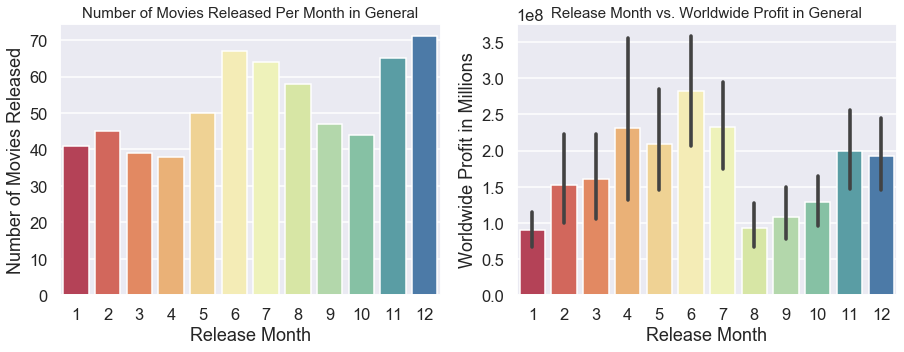

In [55]:
#plot count of movies released per month vs. 'worldwide_profit'
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 5))

#count
sns.catplot(x = 'release_month',
            kind = 'count',
            data = full_df,
            palette = 'Spectral',
            ax = ax[0])

#set labels
ax[0].set_title('Number of Movies Released Per Month in General', fontsize = 15)
ax[0].set_xlabel('Release Month')
ax[0].set_ylabel('Number of Movies Released')

#worldwide_profit
sns.catplot(x = 'release_month',
            y = 'worldwide_profit',
            kind = 'bar',
            data = full_df,
            palette = 'Spectral',
            ax = ax[1])

#set labels
ax[1].set_title('Release Month vs. Worldwide Profit in General', fontsize = 15)
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Worldwide Profit in Millions')

#delete extra plots
plt.close(2)
plt.close(3)

In [16]:
#save
plt.savefig('num_movies_release_profit_catplot')

<Figure size 432x288 with 0 Axes>

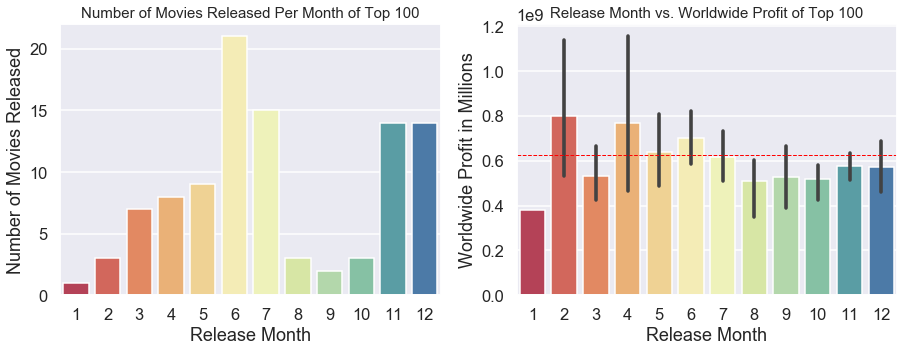

In [56]:
#plot count of movies released per month vs. 'worldwide_profit'
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 5))

#count
sns.catplot(x = 'release_month',
            kind = 'count',
            data = release_month_vs_100_profit,
            palette = 'Spectral',
            ax = ax[0])

#set labels
ax[0].set_title('Number of Movies Released Per Month of Top 100', fontsize = 15)
ax[0].set_xlabel('Release Month')
ax[0].set_ylabel('Number of Movies Released')

#worldwide_profit
sns.catplot(x = 'release_month',
            y = 'worldwide_profit',
            kind = 'bar',
            data = release_month_vs_100_profit,
            palette = 'Spectral',
            ax = ax[1])

#draw mean()
ax[1].axhline(release_month_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
ax[1].set_title('Release Month vs. Worldwide Profit of Top 100', fontsize = 15)
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Worldwide Profit in Millions')

#delete extra plots
plt.close(2)
plt.close(3)

In [18]:
#save
plt.savefig('num_movies_released_vs_profit_100_catplot')

<Figure size 432x288 with 0 Axes>

Looking at both General and the top 100 performers distribution, June is one of the months that have the highest number of movies released. However, in the Top 100, they do not perform as well as those released in Feburary and April. 

Looking at the swarmplot, we see that Feburary and April values are very dispersed while June is more evenly distributed. We recommend June to be our month of release.

## Question 5: Is runtime a factor in determining the success of a movie?

Finally, let's look at Runtime (runtime_minutes)

In [19]:
#get data statistics
full_df['runtime_minutes'].describe()

count    629.000000
mean     108.430843
std       19.456068
min       40.000000
25%       95.000000
50%      106.000000
75%      120.000000
max      180.000000
Name: runtime_minutes, dtype: float64

In general, movies tend to be in the 108 mins mark. Runtime is range from 40mins to 180mins. Let's look at the plot: 

Let's compare the general trend and the top 100 performers to see what is done differently:

In [20]:
#create sub dataframe for runtime vs. worldwide_profit for top 100 performers
runtime_vs_100_profit = full_df[['runtime_minutes', 
                                 'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                  ascending = False)[:100]
runtime_vs_100_profit.head()

,runtime_minutes,worldwide_profit
1,149.0,1744540523
16,124.0,1454943967
31,137.0,1327179709
59,128.0,1138334005
21,134.0,1136498912


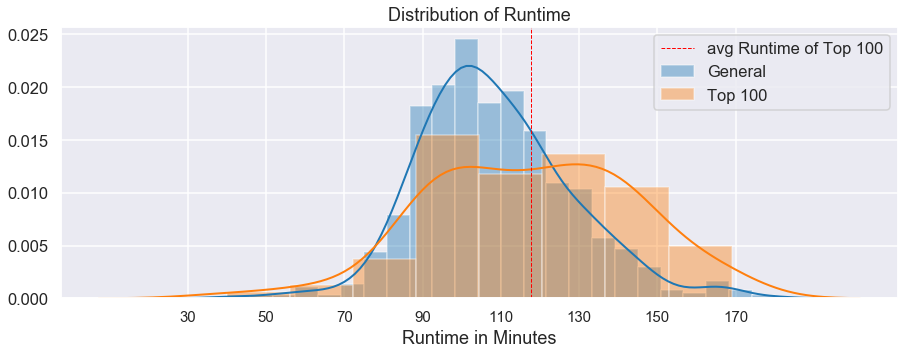

In [60]:
#distribution of 'runtime_minutes'
plt.figure(figsize = (15, 5))

#general
sns.distplot(full_df['runtime_minutes'], label = 'General')

#top 100
sns.distplot(runtime_vs_100_profit['runtime_minutes'], label = 'Top 100')

#draw mean()
plt.axvline(runtime_vs_100_profit['runtime_minutes'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'avg Runtime of Top 100')

#set labels
plt.title('Distribution of Runtime')
plt.xlabel('Runtime in Minutes')
plt.legend()

#set xticks
plt.xticks(np.arange(30, 180, 20), fontsize = 15)

#show
plt.show()

In [22]:
#save
plt.savefig('runtime_distribution_distplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

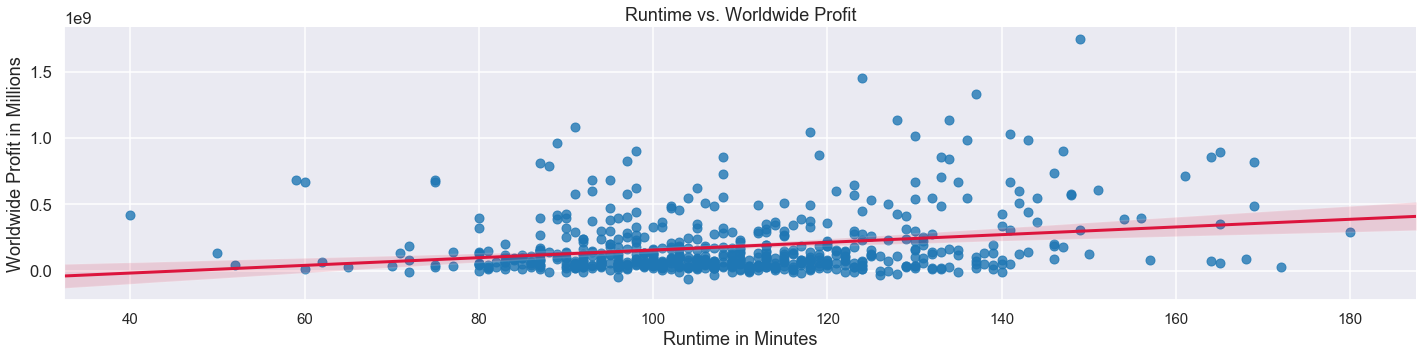

In [23]:
#plot 'runtime' vs. worldwide_profit'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'runtime_minutes',
           y = 'worldwide_profit',
           data = full_df, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Runtime vs. Worldwide Profit')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [24]:
#save
plt.savefig('runtime_vs_profit_lmplot')

<Figure size 432x288 with 0 Axes>

In [25]:
#write r2 function

from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

#get Pearson correlation coefficient
print('The Pearson correlation coefficient is:', r2(full_df['runtime_minutes'], full_df['worldwide_profit']))

The Pearson correlation coefficient is: 0.058978933091809786


Although weak, there is a positive correlation between 'runtime_minutes' and 'worldwide_profit'.

Top 100 performers tends to run with 120mins and longer. Let's confirm this by plotting 'runtime_minutes' with 'worldwide_profit'.

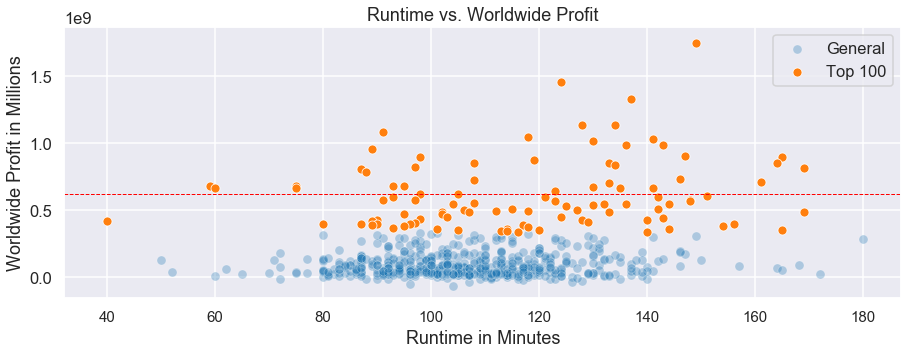

In [61]:
#plot runtime vs. worldwide_profit of top 100 performers
plt.figure(figsize = (15, 5))

#all movies
sns.scatterplot(x = full_df['runtime_minutes'], 
                      y = full_df['worldwide_profit'], 
                      label = 'General', alpha = 0.3)

#top 100 performers
sns.scatterplot(x = runtime_vs_100_profit['runtime_minutes'], 
                      y = runtime_vs_100_profit['worldwide_profit'], 
                      label = "Top 100")

#draw mean()
plt.axhline(runtime_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'avg Runtime of Top 100')

#set labels
plt.title('Runtime vs. Worldwide Profit')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [27]:
#save
plt.savefig('runtime_vs_profit_scatterplot')

<Figure size 432x288 with 0 Axes>

In [28]:
#comparing average runtime between general trend and top 100 performers successful trend
print('The average runtime in general is', full_df['runtime_minutes'].mean(), 'minutes')
print('The average runtime in top 100 performers is', runtime_vs_100_profit['runtime_minutes'].mean(), 'minutes')

The average runtime in general is 108.4308426073132 minutes
The average runtime in top 100 performers is 117.75 minutes


As we can see, top performers from runtime_vs_100_profit dataset and the plot, top performers do very well in the range of ~120mins and longer.

## Extra: Is there one single best studio?

In [29]:
#studio_distribution values
y_values = full_df['studio'].value_counts(ascending=False)[:10]
x_values = y_values.index

y_values

Uni.       98
Fox        86
WB         71
BV         59
Sony       50
Par.       50
WB (NL)    42
LGF        32
LG/S       19
SGem       16
Name: studio, dtype: int64

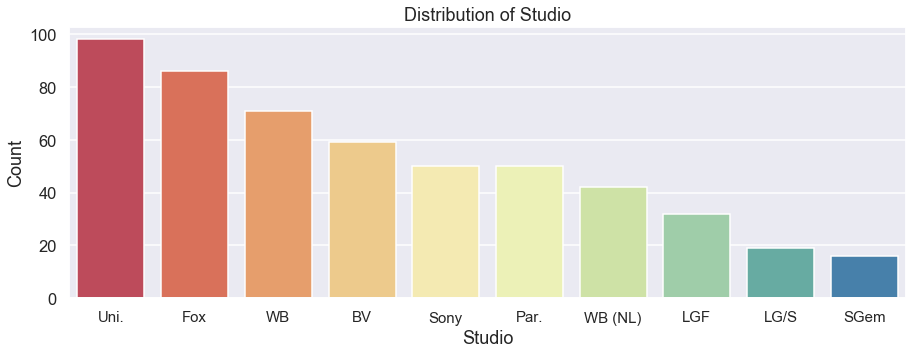

In [30]:
#plot studio distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Studio')
plt.xlabel('Studio')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [31]:
#save
plt.savefig('studio_distribution_barplot')

<Figure size 432x288 with 0 Axes>

Universal Studio, Fox and Warner Bros are the 3 most popular studios. Which one makes the highest profit?

In [32]:
#create sub dataframe for 'studio' and 'worldwide_profit'
studio_vs_100_profit = full_df[['studio', 'production_budget',
                                'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                 ascending = False)[:100]
studio_vs_100_profit.head()

,studio,production_budget,worldwide_profit
1,BV,300000000,1744540523
16,Uni.,215000000,1454943967
31,Uni.,190000000,1327179709
59,Uni.,170000000,1138334005
21,BV,200000000,1136498912


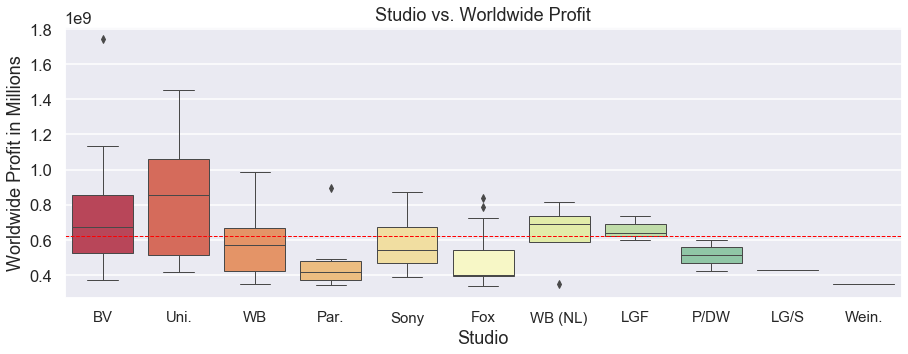

In [33]:
#plot 'studio' vs. 'worldwide_profit' of top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = studio_vs_100_profit['studio'], 
            y = studio_vs_100_profit['worldwide_profit'],
            palette = 'Spectral',
            linewidth = 1)

#draw mean()
plt.axhline(studio_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Studio vs. Worldwide Profit')
plt.xlabel('Studio')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [34]:
#save
plt.savefig('studio_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

In [35]:
#get descriptive statistics for 'BV' worldwide_gross
studio_vs_100_profit.loc[studio_vs_100_profit['studio'] == 'BV', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            27.000000
mean      723783340.666667
std       291138096.046028
min       369606532.000000
25%       527471405.000000
50%       670482778.000000
75%       855545278.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

In [36]:
#get descriptive statistics for 'BV' production_budget
studio_vs_100_profit.loc[studio_vs_100_profit['studio'] == 'BV', 'production_budget'].describe().apply(lambda x: format(x, 'f'))


count           27.000000
mean     188518518.518519
std       49025401.869745
min      130000000.000000
25%      167500000.000000
50%      175000000.000000
75%      200000000.000000
max      365000000.000000
Name: production_budget, dtype: object

In [37]:
#get descriptive statistics for 'Uni.' worldwide_gross
studio_vs_100_profit.loc[studio_vs_100_profit['studio'] == 'Uni.', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            14.000000
mean      825991950.714286
std       348545165.719824
min       417507776.000000
25%       512261995.500000
50%       854759667.500000
75%      1060899304.000000
max      1454943967.000000
Name: worldwide_profit, dtype: object

In [38]:
#get descriptive statistics for 'Uni.' production_budget
studio_vs_100_profit.loc[studio_vs_100_profit['studio'] == 'Uni.', 'production_budget'].describe().apply(lambda x: format(x, 'f'))


count           14.000000
mean     102785714.285714
std       71254882.231032
min       40000000.000000
25%       54750000.000000
50%       75000000.000000
75%      146500000.000000
max      250000000.000000
Name: production_budget, dtype: object

In [39]:
#get descriptive statistics for 'WB' worldwide_gross
studio_vs_100_profit.loc[studio_vs_100_profit['studio'] == 'WB', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count           16.000000
mean     564085348.937500
std      179112130.429306
min      349370715.000000
25%      424457600.500000
50%      570214679.500000
75%      668793055.000000
max      983758700.000000
Name: worldwide_profit, dtype: object

In [40]:
#get descriptive statistics for 'WB' production_budget
studio_vs_100_profit.loc[studio_vs_100_profit['studio'] == 'WB', 'production_budget'].describe().apply(lambda x: format(x, 'f'))


count           16.000000
mean     173062500.000000
std       59051919.246259
min       58000000.000000
25%      150000000.000000
50%      160000000.000000
75%      195000000.000000
max      300000000.000000
Name: production_budget, dtype: object

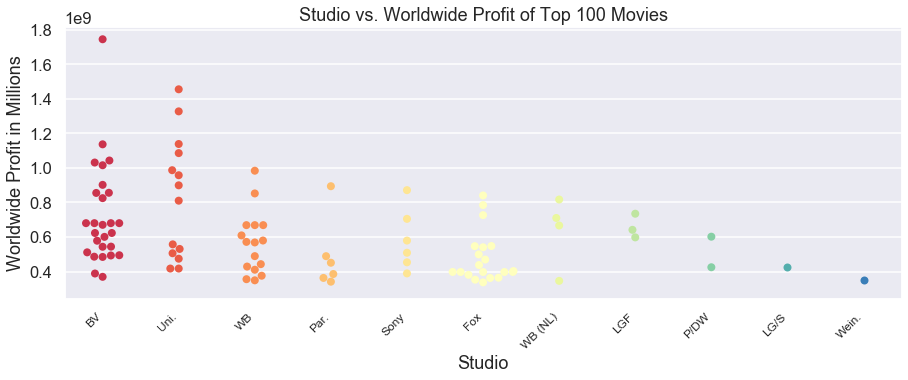

In [41]:
#plot all 'studio' with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'studio',
              y = 'worldwide_profit',
              hue = 'studio',
              data = studio_vs_100_profit,
              s = 8, palette = 'Spectral',)

#set labels
plt.title('Studio vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Studio')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [42]:
#save
plt.savefig('studio_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

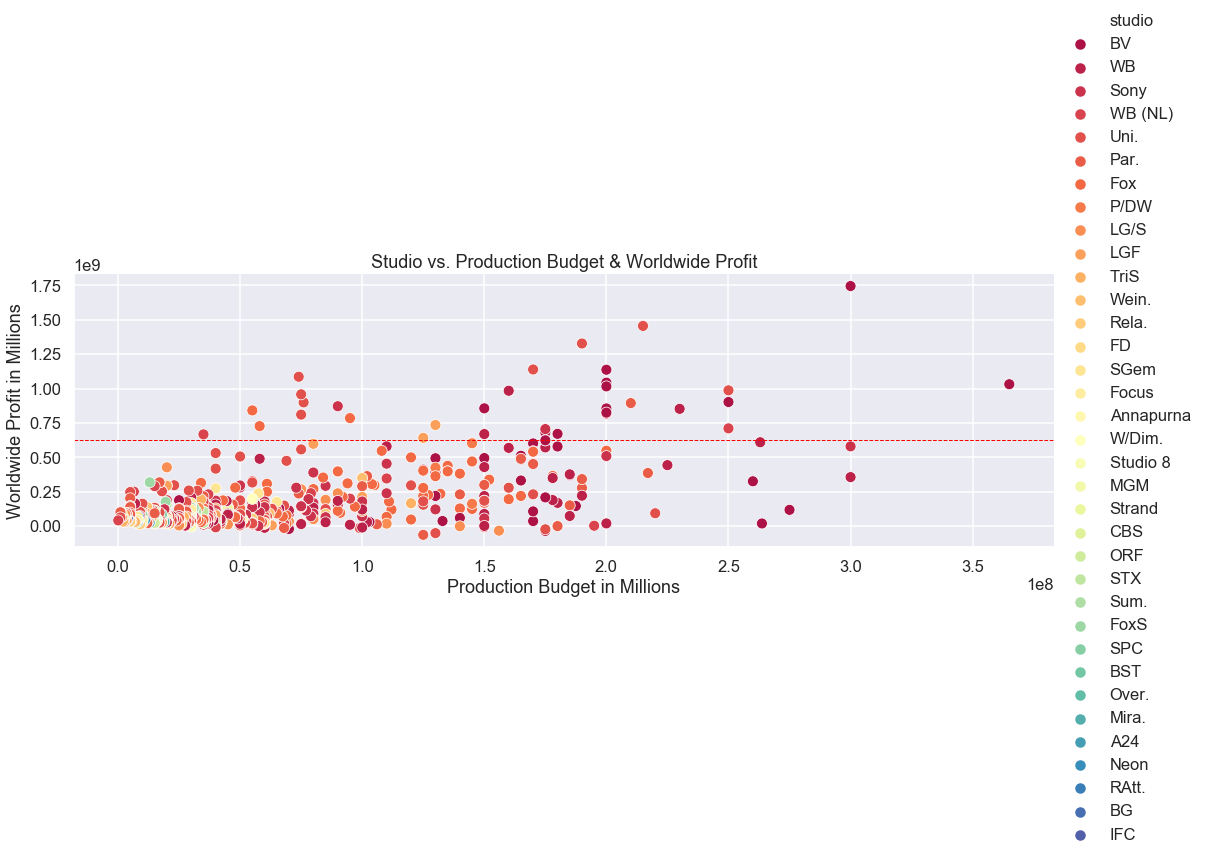

In [62]:
#plot all 'studio' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'studio',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(studio_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'avg Runtime of Top 100')

#set labels
plt.title('Studio vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#show
plt.show()

In [44]:
#save
plt.savefig('studio_budget_profit_relplot')

<Figure size 432x288 with 0 Axes>

We recommend Universal Studio to be our production studio.

## Extra: What is the most popular language?

In [45]:
#language_distribution
y_values = full_df['language'].value_counts(ascending = False)
x_values = y_values.index

y_values #looks like there is only one

en    629
Name: language, dtype: int64

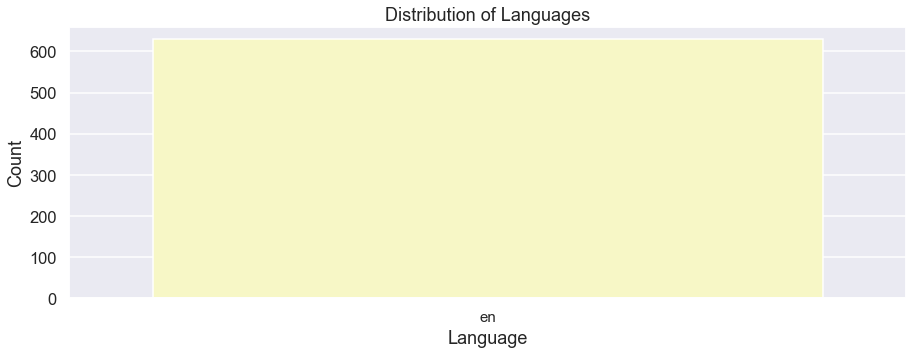

In [46]:
#plot language distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [47]:
#save
plt.savefig('language_distribution_barplot')

<Figure size 432x288 with 0 Axes>

This is not very interesting to look at but makes sense. English is the primary language as all the movies we used were made in the US.

# 3. ACTIONABLE INSIGHTS

Question 1: Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production to get the highest ROI?

        Budget vs Profit: 
        - p = 0.358
        - Production budget is positively correlated with worldwide profit .
        - The average production budget in general is $68M dollars.
        - The average production budget in top 100 performers is $151M dollars
        Decision: $150M and up
        
Question 2: What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

        Genre
        - The average worldwide profit for Action genre is $691M dollars.
        - The average worldwide profit for Adventure genre is $591M dollars.
        - The average worldwide profit for Thriller/Suspense genre is $587M dollars.
        - The average worldwide for Musical genre is $503M dollars.
        Decision: Action and Adventure

        Source
        - The average worldwide profit for Based on Comic/Graphic Novel source is $682M dollars.
        - The average worldwide profit for Based on Fiction Book/Short Story source is $610M dollars.
        - The average worldwide profit for Original Screenplay source is $591M dollars.
        Decision: Based on Comic Graphic/ Novel

        Creative Type
        - The average worldwide profit for Super Hero creative type is $683M dollar.
        - The average worldwide profit for Based on Science Fiction creative type is $595M dollars.
        - The average worldwide profit for Contemporary Fiction creative type is $705M dollars.
        Decision: To be decided between Super Hero vs. Contemporary Fiction

        Production Method
        The average worldwide profit for Animation/Live Action production method is $692M dollar.
        The average worldwide profit for Live Action production method is $606M dollars.
        The average worldwide profit for Digital Animation production method is $606M dollars.
        Decision: Animation/ Live Action

Question 3: Is there a correlation between popularity and positive words of mounth (average rating) and profit? How do they affect the performance of a movie?

        Popularity: 
        - p = 0.274
        - Popularity is positively correlated with worldwide profit.
        
        - Action & Adventure is the most popular genre.
        Decision: Action & Adventure

        - Based on Comic Graphic/ Novel is the most popular source.
        Decision: Based on Comic Graphic/ Novel

        - Super Hero is the most popular creative type.
        Decision: Super Hero is picked over Contemporary Fiction

        - Animation/Live Action is the most popular production method.
        Decision: Animation/Live Action

        Average Rating: 
        - p = 0.089
        - Rating is positively correlated with worldwide profit but not strongly.

        Thriller/Suspense is the highest rated genre.
        - Adventure and Action is the next highest rated genres. 
        Decision: worldwide profit demands Adventure & Action.

        - Original Screen Play is the highest rated source.
        - Based on Comic Graphic/ Novel is the second highest rated source.
        Decision: worldwide profit is high for both categories == combination of both.

        - Science Fiction is the highest rated creative type.
        - Super Hero is second highest rated creative type.
        Decision: worldwide profit is high for both categories == combination of both.

        - Animation/Live Action is the higest rated productin method.
        Decision: Animation/Live Action

Question 4: When is the best time of year to release a movie?

        Decision: June

Question 5: Is there a correlation between runtime and profit? What is the best runtime?

        - p = 0.058
        - Runtime is positively correlated with worldwide profit but not strongly.
        - The average runtime in general is 108 minutes
        - The average runtime in top 100 performers is 118 minutes
        Decision: 120 mins and up

Extra: What is the best production studio?

        - BV is the highest grossing studios
        - Decision: BV

Extra: What is the most popular language?

        - English is the most popular language
        - Decision: English

# **4. CONCLUSION & FUTURE WORKS**

**Future works:**

There are other factors such as star quality, quality of script, special effects, marketing campaign, popularity of the film preceding it (if it's a sequel), competition or lack thereof, competition from non-movie events such as weather or news and sport events. 

Director and writer are also interesting to look at.

Movie researchers has also found that critics have a dual role, where they both influence consumers' movie choice and predict box office performance by reflecting moviegoers' tastes. Unfortunately we won't be investigating these features as they will take up extra time and are all outside the scope of this project.